In [1]:
"""A simple script to manipulate CSL2 height map exported from the game.

Author: HomeOnMars
"""

'A simple script to manipulate CSL2 height map exported from the game.\n\nAuthor: HomeOnMars\n'

In [2]:
# importing

# builtin modules
from datetime import datetime, UTC
now = lambda: datetime.now(UTC)

# 3rd party modules
import numpy as np

# my modules
from pycslhmap import HMap, CSL2HMap

## Example 2: Height Map Manipulation

### Example 2a: Create an empty heightmap

Saving height map data to file './out/playable_default.png'... Done.
CSL2 playable default Height map object:

# Meta data
    Pixels shape  : self.data.shape = (4096, 4096) | self.npix_xy = (4096, 4096)
    Map Widths    : NS/y 14336.00,    WE/x 14336.00,    with len(self._map_widxy) = 2

# Height data insight
    Average height: 208.00 +/- 61.98
    Height  range : [64.00, 256.00]
    Height data storage config :
    |  Minimum  | Sea level |  Maximum  | Resolution |
    |     64.00 |    128.00 |   4096.00 |  0.0004883 |
        
# CSL2-specific data
    Map type      : self._map_type = 'playable'
    Map name      : self.map_name  = 'default'
    Height scale  : self.z_max     = 4096.00
        
Time Used: 0:00:01.455690



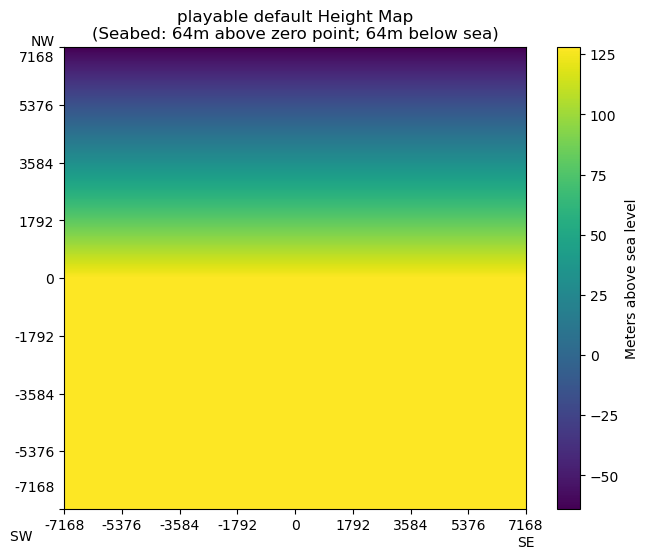

In [3]:
if __name__ == '__main__':

    verbose = True
    
    if verbose:
        # record used time
        runtime_t0 = now()
        #print(f"Start: {time_start.isoformat()}")


    # create an empty heightmap object for the playable area
    pa = CSL2HMap(
        map_type='playable', # as opposed to 'worldmap'
        z_config=(
            64.,    # minimum height
            128.,   # sea level height
            4096.,  # maximum height
            0.,     # height resolution (will auto-determine if zero)
        ),
    )
    # you can set the name of the map (used when saving to save as .png file)
    pa.map_name = 'default'
    # height data is stored in self.data, and you can manipulate it directly
    pa.data[:] = 256  # this set the height in every pixel to 256 meter
    pa.data[:pa.npix_xy[0]//2] = np.linspace(       # this sets the upper half of the height map...
        64., 256., pa.npix_xy[0]//2)[:, np.newaxis] #    to a slope rising from 64m to 256m.
                                                    # (pa.npix_xy returns the shape of the heightmap as a tuple)
    # save to disk
    pa.save(
        dir_path='./out/',  # output directory path (do not forget the '/' at the end)
    )  # this is now saved to disk as './out/playable_default.png', readable by CSL2
    # print a readable summary
    print(pa)
    # plot the heightmap for a quick look
    pa.plot()
    
    if verbose:
        # record used time
        runtime_t1 = now()
        runtime_dt  = runtime_t1 - runtime_t0
        print(
            #f"Ended: {time_ended.isoformat()}\n" +
            f"Time Used: {runtime_dt}\n"
        )


### Example 2b: Insert/extract playable area to/from worldmap

Saving height map data to file './out/worldmap_default-new.png'... Done.
CSL2 worldmap default Height map object:

# Meta data
    Pixels shape  : self.data.shape = (4096, 4096) | self.npix_xy = (4096, 4096)
    Map Widths    : NS/y 57344.00,    WE/x 57344.00,    with len(self._map_widxy) = 2

# Height data insight
    Average height: 73.00 +/- 38.15
    Height  range : [64.00, 256.00]
    Height data storage config :
    |  Minimum  | Sea level |  Maximum  | Resolution |
    |     64.00 |    128.00 |   4096.00 |  0.0004883 |
        
# CSL2-specific data
    Map type      : self._map_type = 'worldmap'
    Map name      : self.map_name  = 'default'
    Height scale  : self.z_max     = 4096.00
         



CSL2 playable default Height map object:

# Meta data
    Pixels shape  : self.data.shape = (4096, 4096) | self.npix_xy = (4096, 4096)
    Map Widths    : NS/y 14336.00,    WE/x 14336.00,    with len(self._map_widxy) = 2

# Height data insight
    Average height: 207.94 +/- 61.97
    

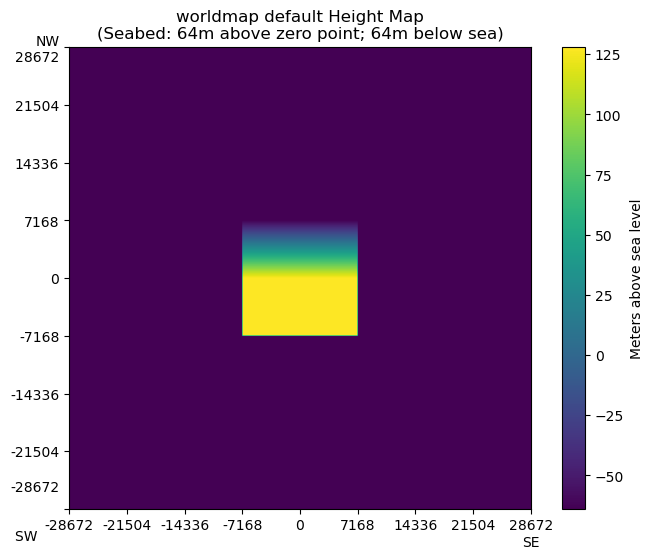

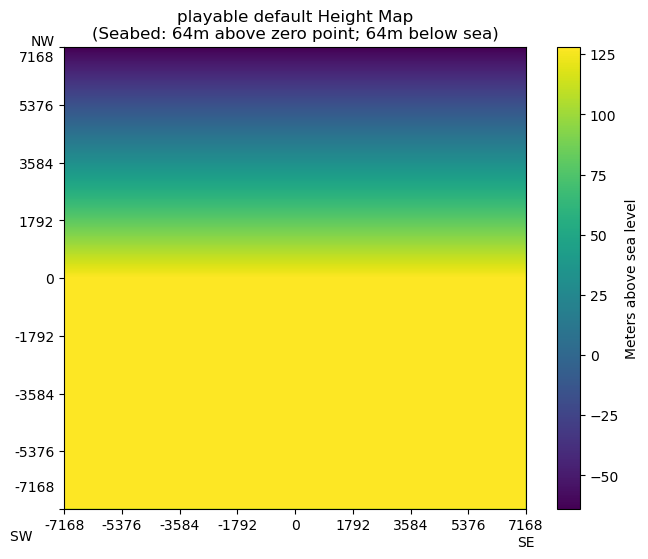

In [4]:
if __name__ == '__main__':

    verbose = True
    
    if verbose:
        # record used time
        runtime_t0 = now()
        #print(f"Start: {time_start.isoformat()}")


    # create an empty heightmap object for the world map
    wm = CSL2HMap(
        map_type='worldmap', # as opposed to 'playable'
        z_config=(
            64.,    # minimum height
            128.,   # sea level height
            4096.,  # maximum height
            0.,     # height resolution (will auto-determine if zero)
        ),
        map_name = 'default', # map name can also be set when initializing
    )
    # height data is stored in self.data, and you can manipulate it directly
    wm.data[:] =  64  # this set the height in every pixel to 64 meter
    #pa.data[:] = 128  # same as above
    # you can put playable area data into the center of the world map:
    wm_new = wm.insert_playable(pa)    # this will create a copy
    # show result
    wm_new.plot()
    # save to disk
    wm_new.save(
        dir_path='./out/',  # output directory path (do not forget the '/' at the end)
        map_name='default-new', # you can override the name of the map here
    )  # this is now saved to disk as './out/playable_default.png', readable by CSL2
    # print a readable summary
    print(wm_new, '\n\n\n')
    # you can extract the playable area back from the world map
    #    note: there will be loss of data due to lower resolution of the worldmap if you insert then extract
    #    Be careful about the spline interpolation order (interp_order): 2 or more may produce artifacts that gives pillars or holes near cliffs or riverbeds.
    pa_new = wm_new.extract_playable(interp_order=1)
    pa_new.plot()
    print(pa_new, '\n\n\n')
    
    if verbose:
        # record used time
        runtime_t1 = now()
        runtime_dt  = runtime_t1 - runtime_t0
        print(
            #f"Ended: {time_ended.isoformat()}\n" +
            f"Time Used: {runtime_dt}\n"
        )


Loading height map data from file './out/playable_default.png'... Done.

CSL2 playable default Height map object:

# Meta data
    Pixels shape  : self.data.shape = (4096, 4096) | self.npix_xy = (4096, 4096)
    Map Widths    : NS/y 14336.00,    WE/x 14336.00,    with len(self._map_widxy) = 2

# Height data insight
    Average height: 207.98 +/- 61.99
    Height  range : [64.00, 256.00]
    Height data storage config :
    |  Minimum  | Sea level |  Maximum  | Resolution |
    |     64.00 |    128.00 |   4096.00 |  0.0004883 |
        
# CSL2-specific data
    Map type      : self._map_type = 'playable'
    Map name      : self.map_name  = 'default'
    Height scale  : self.z_max     = 4096.00
        


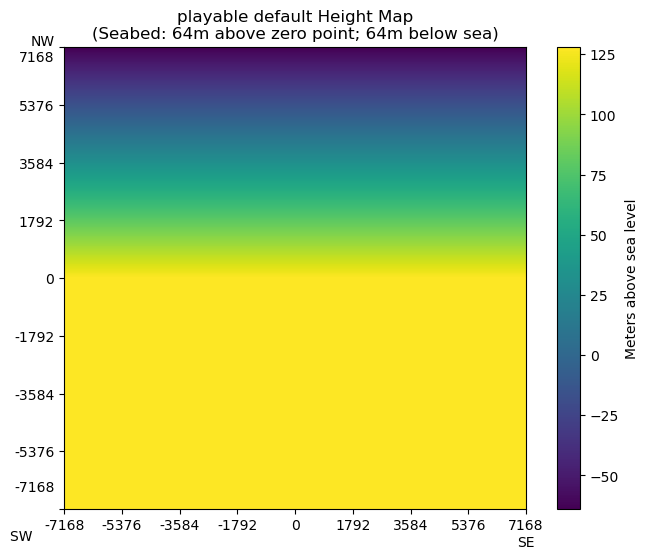

In [5]:
if __name__ == '__main__':
    # you can read the saved png too
    pa_loaded = CSL2HMap().load(
        dir_path='./out/', map_name='default', map_type='playable',
        z_min = 64.0, z_sea = 128.0, z_max = 4096.,   # provide the minimum/sea level/maximum height info (especially maximum height)
    )
    pa_loaded.plot()

In [6]:
if __name__ == '__main__':

    verbose = True
    
    if verbose:
        # record used time
        runtime_t0 = now()
        #print(f"Start: {time_start.isoformat()}")


    # create an empty heightmap object for the world map
    wm = CSL2HMap(
        map_type='worldmap', # as opposed to 'playable'
        z_config=(
            64.,    # minimum height
            128.,   # sea level height
            4096.,  # maximum height
            0.,     # height resolution (will auto-determine if zero)
        ),
        map_name = 'default', # map name can also be set when initializing
    )
    # height data is stored in self.data, and you can manipulate it directly
    wm.data[:] =  64  # this set the height in every pixel to 64 meter
    pa = CSL2HMap()
    pa.data[:] = 128  # same as above
    # you can put playable area data into the center of the world map:
    wm_new = wm.insert_playable(pa)    # this will create a copy
    # save to disk
    wm_new.save(
        dir_path='./out/',  # output directory path (do not forget the '/' at the end)
        map_name='worldMapMini', # you can override the name of the map here
    )  # this is now saved to disk as './out/playable_default.png', readable by CSL2
    # print a readable summary
    print(wm_new, '\n\n\n')
    # you can extract the playable area back from the world map
    #    note: there will be loss of data due to lower resolution of the worldmap if you insert then extract
    #    Be careful about the spline interpolation order (interp_order): 2 or more may produce artifacts that gives pillars or holes near cliffs or riverbeds.
    pa_new = wm_new.extract_playable(interp_order=1)
    print(pa_new, '\n\n\n')
    
    if verbose:
        # record used time
        runtime_t1 = now()
        runtime_dt  = runtime_t1 - runtime_t0
        print(
            #f"Ended: {time_ended.isoformat()}\n" +
            f"Time Used: {runtime_dt}\n"
        )


Saving height map data to file './out/worldmap_worldMapMini.png'... Done.
CSL2 worldmap default Height map object:

# Meta data
    Pixels shape  : self.data.shape = (4096, 4096) | self.npix_xy = (4096, 4096)
    Map Widths    : NS/y 57344.00,    WE/x 57344.00,    with len(self._map_widxy) = 2

# Height data insight
    Average height: 68.00 +/- 15.49
    Height  range : [64.00, 128.00]
    Height data storage config :
    |  Minimum  | Sea level |  Maximum  | Resolution |
    |     64.00 |    128.00 |   4096.00 |  0.0004883 |
        
# CSL2-specific data
    Map type      : self._map_type = 'worldmap'
    Map name      : self.map_name  = 'default'
    Height scale  : self.z_max     = 4096.00
         



CSL2 playable default Height map object:

# Meta data
    Pixels shape  : self.data.shape = (4096, 4096) | self.npix_xy = (4096, 4096)
    Map Widths    : NS/y 14336.00,    WE/x 14336.00,    with len(self._map_widxy) = 2

# Height data insight
    Average height: 127.97 +/- 0.79
    

# Manuals

### HMap()

Generic height map class

In [7]:
if __name__ == '__main__':
    help(HMap)

Help on class HMap in module pycslhmap.hmap.base:

class HMap(builtins.object)
 |  HMap(data: Union[Self, collections.abc.Buffer, numpy._typing._array_like._SupportsArray[numpy.dtype[Any]], numpy._typing._nested_sequence._NestedSequence[numpy._typing._array_like._SupportsArray[numpy.dtype[Any]]], bool, int, float, complex, str, bytes, numpy._typing._nested_sequence._NestedSequence[Union[bool, int, float, complex, str, bytes]]] = array([[0., 0., 0., ..., 0., 0., 0.],
 |         [0., 0., 0., ..., 0., 0., 0.],
 |         [0., 0., 0., ..., 0., 0., 0.],
 |         ...,
 |         [0., 0., 0., ..., 0., 0., 0.],
 |         [0., 0., 0., ..., 0., 0., 0.],
 |         [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), map_width: None | float | tuple[float, float] = None, pix_width: None | float | tuple[float, float] = 1.0, z_config: None | tuple[float, float, float, float] = None, z_min: float = 0.0, z_sea: float = 0.0, z_max: float = 1024.0, z_res: None | float = None, copy: bool = True, use_data_m

### CSL2HMap()

CSL2 specific height map class

In [8]:
if __name__ == '__main__':
    help(CSL2HMap)

Help on class CSL2HMap in module pycslhmap.hmap.csl:

class CSL2HMap(pycslhmap.hmap.base.HMap)
 |  CSL2HMap(data: Union[Self, pycslhmap.hmap.base.HMap, collections.abc.Buffer, numpy._typing._array_like._SupportsArray[numpy.dtype[Any]], numpy._typing._nested_sequence._NestedSequence[numpy._typing._array_like._SupportsArray[numpy.dtype[Any]]], bool, int, float, complex, str, bytes, numpy._typing._nested_sequence._NestedSequence[Union[bool, int, float, complex, str, bytes]]] = array([[0., 0., 0., ..., 0., 0., 0.],
 |         [0., 0., 0., ..., 0., 0., 0.],
 |         [0., 0., 0., ..., 0., 0., 0.],
 |         ...,
 |         [0., 0., 0., ..., 0., 0., 0.],
 |         [0., 0., 0., ..., 0., 0., 0.],
 |         [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), map_type: str = 'playable', map_name: str = '', z_config: tuple[float, float, float, float] = array([6.4000000e+01, 1.2800000e+02, 4.0960000e+03, 4.8828125e-04],
 |        dtype=float32), copy: bool = True, use_data_meta: bool = True, verbo